# Bank Customer Churn Prediction

The aim of this project to analyze the bank customer's demographics and financial information which inculdes customer's age, gender. country, credit score, balance and many others to predict whether the customer will leave the bank or not.

# About the dataset

The dataset is taken from Kaggle. It contains 10000 rows and 14 columns. The objective of the dataset is to predict whether the customer will leave the bank or not, based on the customer's demographics and financial information included in the dataset.

The dataset has several factors that can influence the customer to leave the bank, which are termed as independent variables. The target variable is the customer's decision to leave the bank, which is termed as dependent variable.

# Data Dictionary

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv(r"C:\Users\amits\datascience_projects\Customer Churn Prediction\churn.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.set_index("RowNumber", inplace=True)

In [ ]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA

<Axes: xlabel='Balance', ylabel='Count'>

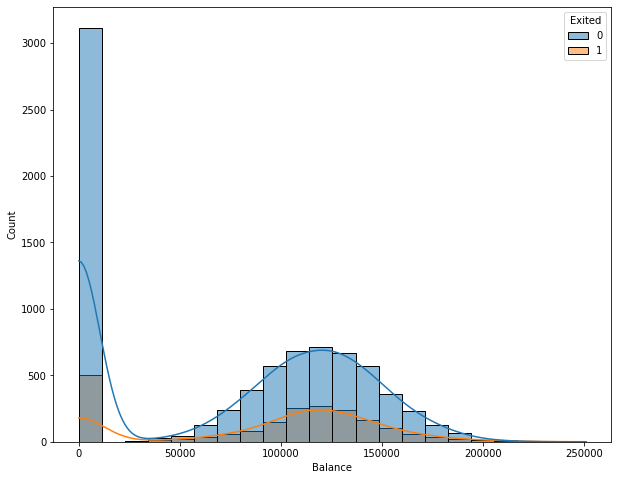

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(x="Balance", data=df, kde=True, hue="Exited")

number of peoples with zero balance are high as compared to other

<Axes: xlabel='CreditScore', ylabel='Density'>

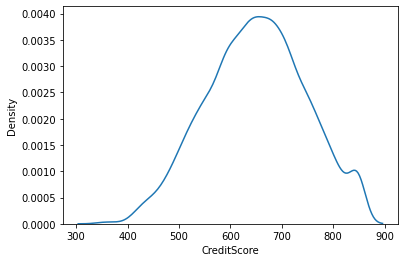

In [ ]:
sns.kdeplot("CreditScore", data=df)

<Axes: ylabel='Exited'>

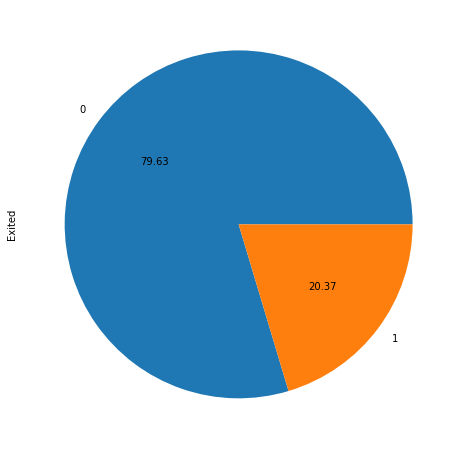

In [ ]:
plt.figure(figsize=(10,8))
df["Exited"].value_counts().plot(kind="pie", autopct="%.2f")

In [ ]:
corr=df.corr()
corr

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

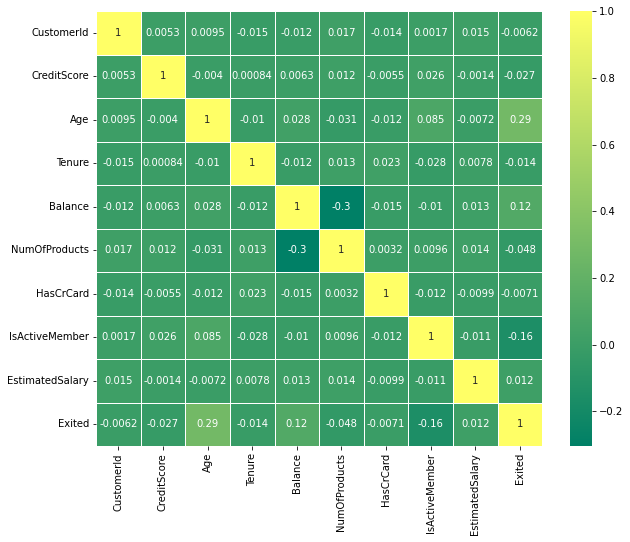

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, linewidth=.5, cmap="summer")

<Axes: xlabel='Exited', ylabel='CreditScore'>

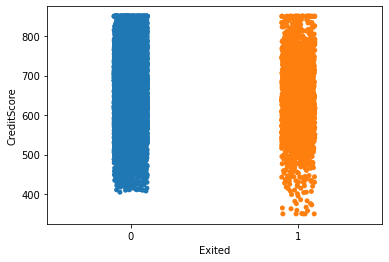

In [ ]:
sns.stripplot(y="CreditScore", x="Exited", data=df, jitter=.1)

C:\Users\amits\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


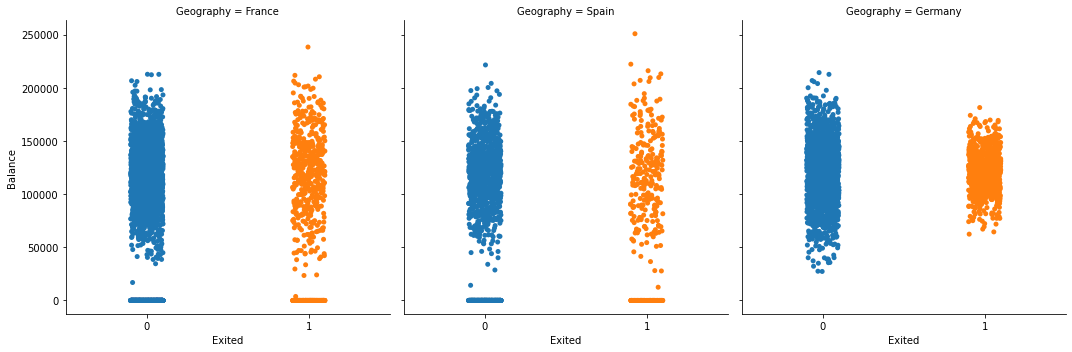

In [ ]:
sns.catplot(y="Balance", x="Exited", data=df, kind="strip", col="Geography")

C:\Users\amits\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


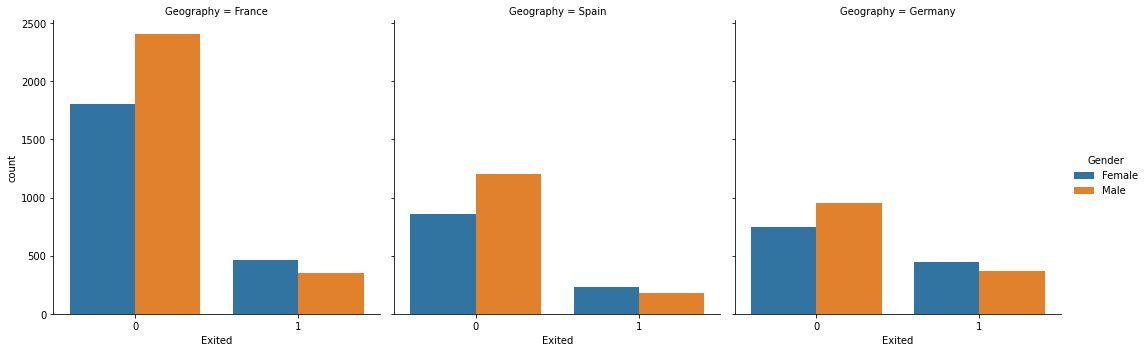

In [ ]:
sns.catplot(x="Exited", data=df, hue="Gender", kind="count", col="Geography")

C:\Users\amits\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


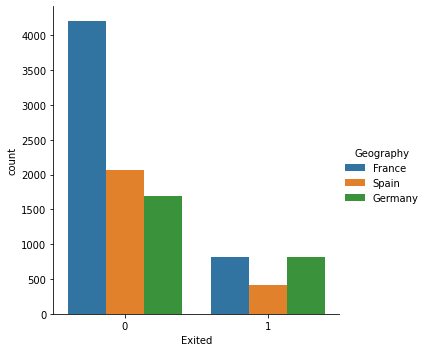

In [ ]:
sns.catplot(x="Exited", data=df, kind="count", hue="Geography")

C:\Users\amits\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


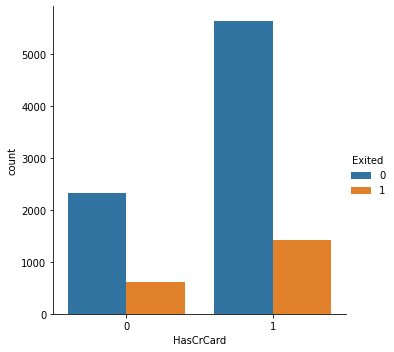

In [ ]:
sns.catplot(x="HasCrCard", hue="Exited", data=df, kind="count")

C:\Users\amits\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


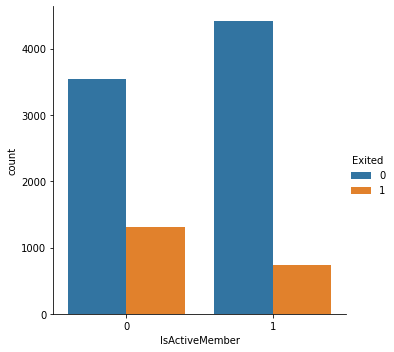

In [ ]:
sns.catplot(x="IsActiveMember", hue="Exited", data=df, kind="count")

# Data Preprocessing

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.3+ MB


In [ ]:
df.drop("Surname", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Geography"]=le.fit_transform(df["Geography"])
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  int32  
 3   Gender           10000 non-null  int32  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 1.2 MB


# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df["Exited"]

In [ ]:
x=df.drop("Exited", axis=1)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split( x, y, test_size=0.3, random_state=10, stratify=y)

In [ ]:
# Performing Standardization

In [ ]:
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
numerical_columns = ["Balance", "EstimatedSalary", "CreditScore", "Age", 'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember']
x_train_scaled[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_test_scaled[numerical_columns] = scaler.fit_transform(x_test[numerical_columns])

In [ ]:
# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log= LogisticRegression()
log.fit(x_train_scaled,y_train)
y_pred= log.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
acc= accuracy_score(y_test, y_pred)
print(cm)

[[2389    0]
 [ 611    0]]


<Axes: >

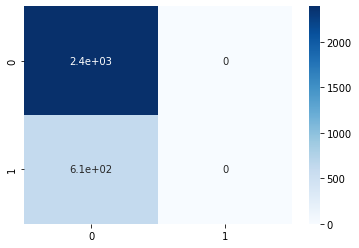

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues")

In [ ]:
log= LogisticRegression()
log.fit(x_train_scaled,y_train)
y_pred= log.predict(x_train_scaled)

In [ ]:
ac= accuracy_score(y_train, y_pred)
ac

0.7962857142857143

In [ ]:
print("testing accuracy:", acc)
print("training accuracy:", ac)

testing accuracy: 0.7963333333333333
training accuracy: 0.7962857142857143


In [ ]:
# it is generalized model

In [ ]:
# svc

In [ ]:
# from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# svc=SVC()

In [ ]:
# param_grid = {
#     'C': [0.1, 1, 10],              # Regularization parameter
#     'kernel': ['linear', 'rbf'],    # Kernel function
#     'gamma': ['scale', 'auto', 1],  # Kernel coefficient (only for 'rbf' and 'poly')
# }

# # 5. Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

# # 6. Fit the GridSearchCV to the training data
# grid_search.fit(x_train_scaled, y_train)

# # 7. Get the best hyperparameters and estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # 8. Evaluate the best model on the test data
# y_pred = best_estimator.predict(x_test_scaled)
# test_accuracy = accuracy_score(y_test, y_pred)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy:", test_accuracy)

In [ ]:
# Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()


param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0, 42],
}


grid_search = GridSearchCV(dtree, param_grid=param_grid, cv = 5,  scoring = 'roc_auc', n_jobs = -1, verbose = 1)

grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'random_state': 42}

In [ ]:
dtree=DecisionTreeClassifier(criterion= 'gini',max_depth= 6, min_samples_leaf= 10,random_state= 42 )
dtree.fit(x_train,y_train)
y_pred= dtree.predict(x_test)

In [ ]:
ac= accuracy_score(y_test, y_pred)
ac

0.8483333333333334

In [ ]:
# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

param_grid={
    'max_depth':[2,4,6,8,10,14,15,17,20],
    'min_samples_leaf':[1,2,3,4,5,7,8,9,10],
    'criterion' : ["gini", "entropy"],
    'random_state' :[0,42]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5,  scoring = 'roc_auc', n_jobs = -1, verbose = 1 )

grid_search.fit(x_train,y_train)

grid_search.best_params_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'random_state': 42}

In [ ]:
rfc=RandomForestClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 3, random_state= 42 )
rfc.fit(x_train,y_train)
y_pred= rfc.predict(x_test)

In [ ]:
ac= accuracy_score(y_test, y_pred)
ac

0.8483333333333334

In [ ]:
import pickle

In [ ]:
pickle.dump(rfc,open("churn.pkl", "wb"))

In [2]:
df.head()

NameError: name 'df' is not defined